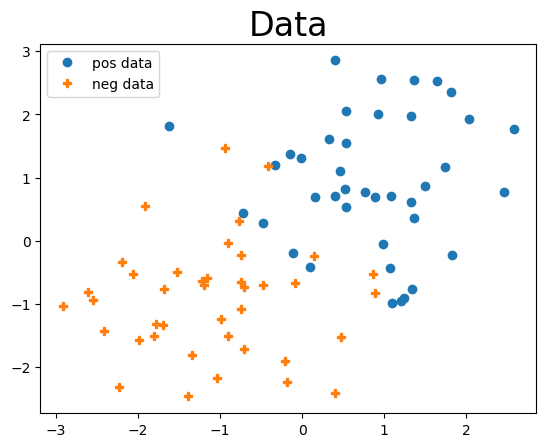

In [37]:
import numpy as np  # numeriacal computing
import matplotlib.pyplot as plt  # plotting core
import seaborn as sns  # higher level plotting tools

np.random.seed(42)  ## generate the same sequence of random points
# Generate 2 clusters of data, by drawing from a normal distribution.
S = np.eye(2)  ## covariance matrix, set to indenty matrix i.e. x,y independent. 
p_pos = np.random.multivariate_normal([1, 1], S, 40)
p_neg = np.random.multivariate_normal([-1, -1], S, 40)
## 40 points (x,y) coordinates
p_pos.shape

fig, ax = plt.subplots()
ax.plot(p_pos[:, 0], p_pos[:, 1], "o", label='pos data')
ax.plot(p_neg[:, 0], p_neg[:, 1], "P", label='neg data')
plt.title("Data", fontsize=24)
plt.legend()

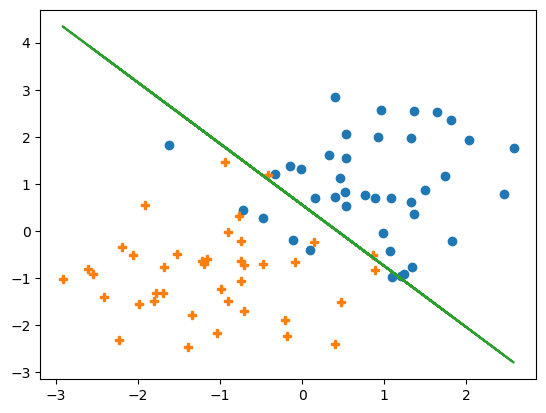

In [58]:
def linear_boundary(x, w):
  """
  :param x: x values of the line.
  :param w: List of model parameters [bias, slope] of the line.
  :return: y-values of the boundary / line .
  """
  slope, bias = w
  return slope * x + bias

def generate_decision_boundary(dasaset, w):
  """
  :return: List of points that form the decision boundary.
  """
  boundary_points = []
  points = np.vstack((dataset[0], dataset[1]))
  for x, y in points:
    boundary_points.append([x, linear_boundary(x, w)])
  return np.array(boundary_points)

dataset = [p_pos, p_neg]
w = [-1.3, 0.55] # slope and bias manually set
dec_bound = generate_decision_boundary(dataset, w)

fig, ax = plt.subplots()
ax.plot(p_pos[:, 0], p_pos[:, 1], "o", label='pos data')
ax.plot(p_neg[:, 0], p_neg[:, 1], "P", label='neg data')
ax.plot(dec_bound[:, 0], dec_bound[:, 1], label='decision boundary')
xb = np.linspace(-3, 3, 100)

In [39]:
def predict(p, w):
  """
  :param w: parameters of your decision function.
  :param p: The data point to predict.
  
  :return: 0 if `neg` class / 1 if `pos` class.
  """
  return p > linear_boundary(p, w)

def accuracy(predictions, targets):
  """
  :param predictions: 1D-array of predicted classes for the data.
  :param targets: 1D-array of actual classes for the data.
    
  :return: fraction of correctly predicted points (num_correct/num_points).
  """
  correct = 0
  for i in range(len(predictions)):
    if predictions[i] == targets[i]:
      correct += 1
  return correct / len(predictions)

In [40]:
# Print accuracy
w = [-1.3, 0.55]
predictions_pos = predict(p_pos[:, 0], w)
predictions_neg = predict(p_neg[:, 1], w)

targets_pos = np.ones(len(predictions_pos))
accuracy_pos = accuracy(predictions_pos, targets_pos)
print('Accuracy p_pos:', accuracy_pos)

targets_neg = np.zeros(len(predictions_neg))
accuracy_neg = accuracy(predictions_neg, targets_neg)
print('Accuracy p_neg:', accuracy_neg)

Accuracy p_pos: 0.775
Accuracy p_neg: 0.9


Accuracy for the current model parameters: 0.875


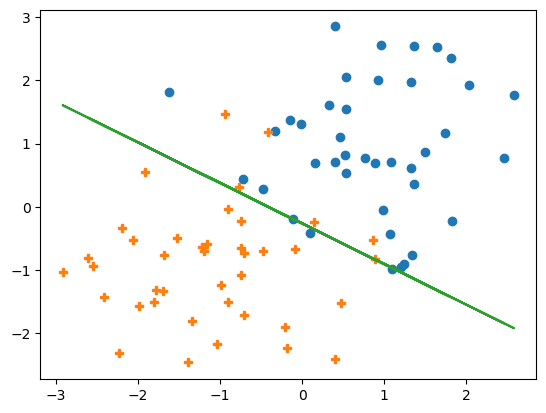

In [77]:
def random_optimization(dataset, num_iterations=1000):
  """
  Performs a random search optimization to find the best decision boundary for a 2-class dataset.
  :param dataset: The dataset, structured as [negative examples, positive examples].
  :param num_iterations: Number of random configurations to test.

  :return: The best parameters found and their score.
  """
  best_params = []
  best_score = 0
  targets_neg = np.zeros(len(dataset[0]))
  targets_pos = np.ones(len(dataset[1]))

  for i in range(num_iterations):
    # Generate random parameters
    w = np.random.randn(1,2)[0]
    # Predict classes
    predictions_neg = predict(dataset[0][:, 0], w)
    predictions_pos = predict(dataset[1][:, 0], w)
    # print(predictions_neg)
    # Compute accuracy
    accuracy_neg = accuracy(predictions_neg, targets_neg)
    accuracy_pos = accuracy(predictions_pos, targets_pos)
    score = (accuracy_pos + accuracy_neg) / 2
    # Check if better than current best
    if score > best_score:
      best_score = score
      best_params = w

  return best_params, best_score


dataset = [p_neg, p_pos]
num_iterations = 50
best_params, best_score = random_optimization(dataset, num_iterations)
print("Accuracy for the current model parameters:", best_score)

dec_boundary = generate_decision_boundary(dataset, best_params)

fig, ax = plt.subplots()
ax.plot(p_pos[:, 0], p_pos[:, 1], "o", label='pos data')
ax.plot(p_neg[:, 0], p_neg[:, 1], "P", label='neg data')
ax.plot(dec_boundary[:, 0], dec_boundary[:, 1], label='decision boundary')
xb = np.linspace(-3, 3, 100)

# Based on the results, determine if a linear decision boundary is suitable for your dataset.
# -> Based on the results, a linear decision boundary is suitable for this dataset because the data is almost linearly separable.
# Discuss the efficiency of random search in optimizing the decision boundary and its limitations.
# -> Random search is not efficient because it is not guided by any information about the data. It is also not guaranteed to find the best solution.